# Import data from flat file 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("MCU_vs_DC.csv")

In [3]:
data.head()

,UnknownColumn,Original Title,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
0,1,Iron Man,Marvel,7.9,79,126,2008,140000000,98618668,318604126,585366247
1,2,The Incredible Hulk,Marvel,6.7,61,112,2008,150000000,55414050,134806913,263427551
2,3,Iron Man 2,Marvel,7.0,57,124,2010,200000000,128122480,312433331,623933331
3,4,Thor,Marvel,7.0,57,115,2011,150000000,65723338,181030624,449326618
4,5,Captain America: The First Avenger,Marvel,6.9,66,124,2011,140000000,65058524,176654505,370569774


In [4]:
data = data.drop("UnknownColumn", axis=1)

In [5]:
df_1 = pd.DataFrame(data)

In [6]:
df_1.head()

,Original Title,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
0,Iron Man,Marvel,7.9,79,126,2008,140000000,98618668,318604126,585366247
1,The Incredible Hulk,Marvel,6.7,61,112,2008,150000000,55414050,134806913,263427551
2,Iron Man 2,Marvel,7.0,57,124,2010,200000000,128122480,312433331,623933331
3,Thor,Marvel,7.0,57,115,2011,150000000,65723338,181030624,449326618
4,Captain America: The First Avenger,Marvel,6.9,66,124,2011,140000000,65058524,176654505,370569774


# Import data via SQL

In [7]:
import mysql.connector

In [8]:
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Ballycullane_29",
    database='marvel_vs_dc')

In [9]:
# Run the SQL query
mycursor = mydb.cursor()
mycursor

In [10]:
mycursor.execute("SELECT * FROM marvel_vs_dc.imdb_mcu_vs_dc")

In [11]:
myresults = mycursor.fetchall()
type(myresults)

list

In [12]:
myresults[0]

('Captain America',
 1944,
 'Action, Adventure, Sci-Fi',
 244,
 'Approved',
 5.5,
 844,
 0,
 'Elmer Clifton',
 0,
 1,
 82,
 250,
 'MARVEL')

In [13]:
df_2 = pd.DataFrame(myresults)
df_2.columns = mycursor.column_names

In [14]:
df_2.head()

,Title,Year,Genre,Runtime,mpa_rating,imdb_rating,imdb_votes,imdb_gross,Director,tomato_meter,tomato_review,tom_aud_score,tom_ratings,Entity
0,Captain America,1944,"Action, Adventure, Sci-Fi",244,Approved,5.5,844,0,Elmer Clifton,0,1,82,250,MARVEL
1,Howard the Duck,1986,"Action, Adventure, Comedy",110,PG,4.7,44073,16300000,Willard Huyck,13,78,38,50000,MARVEL
2,Blade,1998,"Action, Horror, Sci-Fi",120,R,7.1,251243,70090000,Stephen Norrington,55,103,78,250000,MARVEL
3,X-Men,2000,"Action, Adventure, Sci-Fi",104,PG-13,7.4,580354,157300000,Bryan Singer,82,174,83,250000,MARVEL
4,Blade II,2002,"Action, Fantasy, Horror",117,R,6.7,203813,82350000,Guillermo del Toro,57,150,68,250000,MARVEL


# Merge DataFrames and drop missing values

In [15]:
df_1.shape

(39, 10)

In [16]:
df_2.shape

(90, 14)

In [17]:
merged_data = df_1.merge(df_2, left_on="Original Title", right_on="Title", how="left")

In [18]:
pd.set_option("display.max_columns", None)
merged_data.head()

,Original Title,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide,Title,Year,Genre,Runtime,mpa_rating,imdb_rating,imdb_votes,imdb_gross,Director,tomato_meter,tomato_review,tom_aud_score,tom_ratings,Entity
0,Iron Man,Marvel,7.9,79,126,2008,140000000,98618668,318604126,585366247,Iron Man,2008.0,"Action, Adventure, Sci-Fi",126.0,PG-13,7.9,964114.0,318410000.0,Jon Favreau,94.0,281.0,91.0,250000.0,MARVEL
1,The Incredible Hulk,Marvel,6.7,61,112,2008,150000000,55414050,134806913,263427551,The Incredible Hulk,2008.0,"Action, Adventure, Sci-Fi",112.0,PG-13,6.7,445822.0,134520000.0,Louis Leterrier,67.0,238.0,70.0,250000.0,MARVEL
2,Iron Man 2,Marvel,7.0,57,124,2010,200000000,128122480,312433331,623933331,Iron Man 2,2010.0,"Action, Adventure, Sci-Fi",124.0,PG-13,7.0,742416.0,312430000.0,Jon Favreau,72.0,304.0,71.0,250000.0,MARVEL
3,Thor,Marvel,7.0,57,115,2011,150000000,65723338,181030624,449326618,Thor,2011.0,"Action, Adventure, Fantasy",115.0,PG-13,7.0,767687.0,181030000.0,Kenneth Branagh,77.0,291.0,76.0,100000.0,MARVEL
4,Captain America: The First Avenger,Marvel,6.9,66,124,2011,140000000,65058524,176654505,370569774,Captain America: The First Avenger,2011.0,"Action, Adventure, Sci-Fi",124.0,PG-13,6.9,764786.0,176650000.0,Joe Johnston,80.0,273.0,74.0,100000.0,MARVEL


In [19]:
merged_data.shape

(39, 24)

In [20]:
merged_data.isna().sum()

Original Title         0
Company                0
Rate                   0
Metascore              0
Minutes                0
Release                0
Budget                 0
Opening Weekend USA    0
Gross USA              0
Gross Worldwide        0
Title                  1
Year                   1
Genre                  1
Runtime                1
mpa_rating             1
imdb_rating            1
imdb_votes             1
imdb_gross             1
Director               1
tomato_meter           1
tomato_review          1
tom_aud_score          1
tom_ratings            1
Entity                 1
dtype: int64

In [21]:
merged_data[merged_data["Title"].isnull()]

,Original Title,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide,Title,Year,Genre,Runtime,mpa_rating,imdb_rating,imdb_votes,imdb_gross,Director,tomato_meter,tomato_review,tom_aud_score,tom_ratings,Entity
16,Thor:Ragnarok,Marvel,7.9,74,130,2017,180000000,122744989,315058289,853977126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df = merged_data.dropna()

In [23]:
df.shape

(38, 24)

In [24]:
df.isna().sum()

Original Title         0
Company                0
Rate                   0
Metascore              0
Minutes                0
Release                0
Budget                 0
Opening Weekend USA    0
Gross USA              0
Gross Worldwide        0
Title                  0
Year                   0
Genre                  0
Runtime                0
mpa_rating             0
imdb_rating            0
imdb_votes             0
imdb_gross             0
Director               0
tomato_meter           0
tomato_review          0
tom_aud_score          0
tom_ratings            0
Entity                 0
dtype: int64

# Sorting, indexing and grouping

In [25]:
import numpy as np

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 38
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Original Title       38 non-null     object 
 1   Company              38 non-null     object 
 2   Rate                 38 non-null     float64
 3   Metascore            38 non-null     int64  
 4   Minutes              38 non-null     object 
 5   Release              38 non-null     int64  
 6   Budget               38 non-null     object 
 7   Opening Weekend USA  38 non-null     int64  
 8   Gross USA            38 non-null     int64  
 9   Gross Worldwide      38 non-null     int64  
 10  Title                38 non-null     object 
 11  Year                 38 non-null     float64
 12  Genre                38 non-null     object 
 13  Runtime              38 non-null     float64
 14  mpa_rating           38 non-null     object 
 15  imdb_rating          38 non-null     float

#### Before df_1 and df_2 were merged, the following variables were integer-valued columns: 'Year', 'Runtime', 'imdb_votes',  'imdb_gross', 'tomato_meter', 'tomato_review', 'tom_aud_score', 'tom_ratings'. After the two dataframes were merged, these columns contained NaN, therefore the dtype was changed to a floating point dtype to accommodate the NaN.

In [27]:
# Revert back to dtype int64 to carry out numerical anlysis 

df = df.astype({"Year":'int64', "Runtime":'int64', "imdb_votes":'int64', "imdb_gross":'int64', "tomato_meter":'int64', 
                "tomato_review":'int64', "tom_aud_score":'int64', "tom_ratings":'int64'}) 

In [28]:
df = df.astype({"Minutes":'int64', "Budget":'int64'}) 

In [29]:
# Insert thousand comma separators and currency sign to box office and budget numbers

df.loc[:, "Budget ($)"] ='$'+ df["Budget"].map('{:,d}'.format)
df.loc[:, "Gross Worldwide ($)"] ='$'+ df["Gross Worldwide"].map('{:,d}'.format)

df[["Original Title", "Budget ($)", "Gross Worldwide ($)"]].head()

,Original Title,Budget ($),Gross Worldwide ($)
0,Iron Man,"$140,000,000","$585,366,247"
1,The Incredible Hulk,"$150,000,000","$263,427,551"
2,Iron Man 2,"$200,000,000","$623,933,331"
3,Thor,"$150,000,000","$449,326,618"
4,Captain America: The First Avenger,"$140,000,000","$370,569,774"


#### The formatted columns will become string/object types, therefore we can save them as new columns. With integer type columns, we can perform appropriate data analysis and use statistical methods. This is not possible with object data types. 

In [30]:
df.dtypes[["Budget ($)", "Gross Worldwide ($)"]]

Budget ($)             object
Gross Worldwide ($)    object
dtype: object

In [31]:
# Sort movies from highest to lowest worldwide box office ($)

df_worldwide_gross = df.sort_values("Gross Worldwide", ascending = False)
df_worldwide_gross.loc[:, "Gross Worldwide ($)"] ='$'+ df["Gross Worldwide"].map('{:,d}'.format)
df_worldwide_gross[['Original Title', 'Company', 'Gross Worldwide ($)', 'Year']]

,Original Title,Company,Gross Worldwide ($),Year
21,Avengers: Endgame,Marvel,"$2,797,800,564",2019
18,Avengers: Infinity War,Marvel,"$2,048,359,754",2018
5,The Avengers,Marvel,"$1,518,812,988",2012
10,Avengers: Age of Ultron,Marvel,"$1,402,805,868",2015
17,Black Panther,Marvel,"$1,346,913,161",2018
6,Iron Man Three,Marvel,"$1,214,811,252",2013
12,Captain America: Civil War,Marvel,"$1,153,296,293",2016
36,Aquaman,DC,"$1,148,161,807",2018
22,Spider-Man: Far from Home,Marvel,"$1,131,927,996",2019
20,Captain Marvel,Marvel,"$1,128,274,794",2019


In [32]:
# Sort movies from highest to lowest IMDb rate (rating on scale 1-10 ) and Rotten Tomatometer score (% of professional critic reviews that are positive)

df_imdb_and_tomatometer = df.sort_values(['imdb_rating', 'tomato_meter'], ascending = [False, False])
df_imdb_and_tomatometer[['Original Title', 'Company', 'imdb_rating', 'tomato_meter']]

,Original Title,Company,imdb_rating,tomato_meter
26,The Dark Knight,DC,9.0,94
21,Avengers: Endgame,Marvel,8.4,94
30,The Dark Knight Rises,DC,8.4,87
18,Avengers: Infinity War,Marvel,8.4,85
38,Joker,DC,8.4,68
24,Batman Begins,DC,8.2,84
9,Guardians of the Galaxy,Marvel,8.0,92
5,The Avengers,Marvel,8.0,91
0,Iron Man,Marvel,7.9,94
12,Captain America: Civil War,Marvel,7.8,90


In [33]:
marvel_movies = df[df['Company'] == 'Marvel']
marvel_movies.shape[0]

22

In [34]:
marvel_movies.loc[:, ["Title", "Year"]]

,Title,Year
0,Iron Man,2008
1,The Incredible Hulk,2008
2,Iron Man 2,2010
3,Thor,2011
4,Captain America: The First Avenger,2011
5,The Avengers,2012
6,Iron Man Three,2013
7,Thor: The Dark World,2013
8,Captain America: The Winter Soldier,2014
9,Guardians of the Galaxy,2014


In [35]:
dc_movies = df[df['Company'] == 'DC']
dc_movies.shape[0]

16

In [36]:
dc_movies.loc[:, ["Title", "Year"]]

,Title,Year
23,Catwoman,2004
24,Batman Begins,2005
25,Superman Returns,2006
26,The Dark Knight,2008
27,Watchmen,2009
28,Jonah Hex,2010
29,Green Lantern,2011
30,The Dark Knight Rises,2012
31,Man of Steel,2013
32,Batman v Superman: Dawn of Justice,2016


In [37]:
df_srt = df.set_index(["Entity", "Release"]).sort_index()
df_srt[["Original Title", "Director", "Genre", "mpa_rating"]]

Original Title           Director  \
Entity Release                                                           
DC     2004                                Catwoman              Pitof   
       2005                           Batman Begins  Christopher Nolan   
       2006                        Superman Returns       Bryan Singer   
       2008                         The Dark Knight  Christopher Nolan   
       2009                                Watchmen        Zack Snyder   
       2010                               Jonah Hex      Jimmy Hayward   
       2011                           Green Lantern    Martin Campbell   
       2012                   The Dark Knight Rises  Christopher Nolan   
       2013                            Man of Steel        Zack Snyder   
       2016      Batman v Superman: Dawn of Justice        Zack Snyder   
       2016                           Suicide Squad         David Ayer   
       2017                            Wonder Woman      Patty Jenkins   
       2017                          Justice League        Zack Snyder   
       2018                                 Aquaman          James Wan   
       2019                                 Shazam!  David F. Sandberg   
       2019                                   Joker      Todd Phillips   
MARVEL 2008                                Iron Man        Jon Favreau   
       2008                     The Incredible Hulk    Louis Leterrier   
       2010                              Iron Man 2        Jon Favreau   
       2011                                    Thor    Kenneth Branagh   
       2011      Captain America: The First Avenger       Joe Johnston   
       2012                            The Avengers        Joss Whedon   
       2013                          Iron Man Three        Shane Black   
       2013                    Thor: The Dark World        Alan Taylor   
       2014     Captain America: The Winter Soldier      Anthony Russo   
       2014                 Guardians of the Galaxy         James Gunn   
       2015                 Avengers: Age of Ultron        Joss Whedon   
       2015                                 Ant-Man        Peyton Reed   
       2016              Captain America: Civil War      Anthony Russo   
       2016                          Doctor Strange   Scott Derrickson   
       2017          Guardians of the Galaxy Vol. 2         James Gunn   
       2017                  Spider-Man: Homecoming          Jon Watts   
       2018                           Black Panther       Ryan Coogler   
       2018                  Avengers: Infinity War      Anthony Russo   
       2018                    Ant-Man and the Wasp        Peyton Reed   
       2019                          Captain Marvel         Anna Boden   
       2019                       Avengers: Endgame      Anthony Russo   
       2019               Spider-Man: Far from Home          Jon Watts   

                                     Genre mpa_rating  
Entity Release                                         
DC     2004         Action, Crime, Fantasy      PG-13  
       2005              Action, Adventure      PG-13  
       2006                 Action, Sci-Fi      PG-13  
       2008           Action, Crime, Drama      PG-13  
       2009         Action, Drama, Mystery          R  
       2010         Action, Drama, Fantasy      PG-13  
       2011      Action, Adventure, Sci-Fi      PG-13  
       2012              Action, Adventure      PG-13  
       2013      Action, Adventure, Sci-Fi      PG-13  
       2016      Action, Adventure, Sci-Fi      PG-13  
       2016     Action, Adventure, Fantasy      PG-13  
       2017     Action, Adventure, Fantasy      PG-13  
       2017     Action, Adventure, Fantasy      PG-13  
       2018     Action, Adventure, Fantasy      PG-13  
       2019      Action, Adventure, Comedy      PG-13  
       2019         Crime, Drama, Thriller          R  
MARVEL 2008      Action, Adventure, Sci-Fi      PG-13  
       2008 

# Analysis

#### Summary statistics:

In [38]:
marvel_avg_budget = marvel_movies['Budget'].mean()
marvel_avg_budget

193363636.36363637

In [39]:
# Using the str.format() method to  format a number as a currency string 

number_string = marvel_avg_budget
currency_string = "${:,.2f}".format(number_string)
currency_string

'$193,363,636.36'

Between 2008 and 2019, Marvel had an average budget of $193,363,636.36 for each movie 

In [40]:
dc_avg_budget = dc_movies['Budget'].mean()
dc_avg_budget

171625000.0

In [41]:
number_string_dc = dc_avg_budget
currency_string_dc = "${:,.2f}".format(number_string_dc)
currency_string_dc

'$171,625,000.00'

Between 2004 and 2019, DC had an average budget of $171,625,000 per movie - this is approximately twenty million dollars less than their competitor Marvel

In [42]:
# Summary statistics for opening weekend box office in USA ($)

df.groupby("Company")["Opening Weekend USA"].agg([min, max, 'mean'])

,min,max,mean
Company,,,
DC,5379365,166007347,8.637872e+07
Marvel,55414050,357115007,1.356580e+08


The average opening weekend box office figures for Marvel between 2008 and 2019 was approximately 136 million dollars. Whereas, DC had an average of 86 million dollars. 

In [43]:
# Average Tomatometer score (from professionals) and Tomato audience score (from users) for all DC and Marvel movies released on a yearly basis 

df.groupby(["Company", "Year"])[["tomato_meter", "tom_aud_score"]].mean().round(1)  

tomato_meter  tom_aud_score
Company Year                             
DC      2004           9.0           18.0
        2005          84.0           94.0
        2006          75.0           61.0
        2008          94.0           94.0
        2009          65.0           71.0
        2010          12.0           20.0
        2011          26.0           45.0
        2012          87.0           90.0
        2013          56.0           75.0
        2016          27.0           61.0
        2017          66.5           76.0
        2018          65.0           74.0
        2019          79.0           85.0
Marvel  2008          80.5           80.5
        2010          72.0           71.0
        2011          78.5           75.0
        2012          91.0           91.0
        2013          72.5           76.5
        2014          91.0           92.0
        2015          79.5           84.5
        2016          89.5           87.0
        2017          88.5           87.0
        2018          89.3           81.7
        2019          87.7           76.7

#### Pivot tables are another way of calculating grouped summary statistics. By default, pivot_table takes the mean value for each group.

In [44]:
# Average IMDb rate for all Marvel and DC movies 
df.pivot_table(values="Rate", index="Company")

,Rate
Company,
DC,6.806250
Marvel,7.459091


In [45]:
df.pivot_table(values="Rate", index="Company", aggfunc=np.median)

,Rate
Company,
DC,7.05
Marvel,7.35


#### The interquartile range tells you the spread of the middle half of your distribution. The IQR is used to measure how spread out the data points in a data set are from the mean of the data set. The higher the IQR, the more spread out the data points; the smaller the IQR, the more clustered the data points are around the mean.

In [46]:
# IQR for IMDb rate

def iqr(column) :
    return column.quantile(0.75) - column.quantile(0.25)

In [47]:
marvel_movies["Rate"].agg(iqr)

0.75

In [48]:
dc_movies["Rate"].agg(iqr)

1.75

# Conditional statements and looping

In [49]:
df.groupby("Director")["Title"].count()

Director
Alan Taylor          1
Anna Boden           1
Anthony Russo        4
Bryan Singer         1
Christopher Nolan    3
David Ayer           1
David F. Sandberg    1
James Gunn           2
James Wan            1
Jimmy Hayward        1
Joe Johnston         1
Jon Favreau          2
Jon Watts            2
Joss Whedon          2
Kenneth Branagh      1
Louis Leterrier      1
Martin Campbell      1
Patty Jenkins        1
Peyton Reed          2
Pitof                1
Ryan Coogler         1
Scott Derrickson     1
Shane Black          1
Todd Phillips        1
Zack Snyder          4
Name: Title, dtype: int64

In [50]:
df_directors = df[["Director"]]

df_directors = df_directors.sort_values("Director")
df_directors = df_directors.drop(labels=[8, 18, 12, 30, 26, 14, 0, 15, 5, 11, 32, 35, 27], axis=0)

movies_directed = [1, 1, 4, 1, 3, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4]
df_directors["movies_directed"] = movies_directed
df_directors = pd.DataFrame(df_directors)
df_directors.set_index("Director", inplace = True)

df_directors[df_directors["movies_directed"] > 1]

,movies_directed
Director,
Anthony Russo,4
Christopher Nolan,3
James Gunn,2
Jon Favreau,2
Jon Watts,2
Joss Whedon,2
Peyton Reed,2
Zack Snyder,4


In [51]:
# Loop over dictionary

director_dict = {
"Alan Taylor":1,
"Anna Boden":1,
"Anthony Russo":4,
"Bryan Singer":1,
"Christopher Nolan":3,
"David Ayer":1,
"David F. Sandberg":1,
"James Gunn":2,
"James Wan":1,
"Jimmy Hayward":1,
"Joe Johnston":1,
"Jon Favreau":2,
"Jon Watts":2,
"Joss Whedon":2,
"Kenneth Branagh":1,
"Louis Leterrier":1,
"Martin Campbell":1,
"Patty Jenkins":1,
"Peyton Reed":2,
"Pitof":1,
"Ryan Coogler":1,
"Scott Derrickson":1,
"Shane Black":1,
"Todd Phillips":1,
"Zack Snyder":4    
}

for director, number in director_dict.items():
  print(f'{director} directed {number} movie/s')
else:
    print("No directors left.")

Alan Taylor directed 1 movie/s
Anna Boden directed 1 movie/s
Anthony Russo directed 4 movie/s
Bryan Singer directed 1 movie/s
Christopher Nolan directed 3 movie/s
David Ayer directed 1 movie/s
David F. Sandberg directed 1 movie/s
James Gunn directed 2 movie/s
James Wan directed 1 movie/s
Jimmy Hayward directed 1 movie/s
Joe Johnston directed 1 movie/s
Jon Favreau directed 2 movie/s
Jon Watts directed 2 movie/s
Joss Whedon directed 2 movie/s
Kenneth Branagh directed 1 movie/s
Louis Leterrier directed 1 movie/s
Martin Campbell directed 1 movie/s
Patty Jenkins directed 1 movie/s
Peyton Reed directed 2 movie/s
Pitof directed 1 movie/s
Ryan Coogler directed 1 movie/s
Scott Derrickson directed 1 movie/s
Shane Black directed 1 movie/s
Todd Phillips directed 1 movie/s
Zack Snyder directed 4 movie/s
No directors left.


In [52]:
director_name = 'Christopher Nolan'

for director, number in director_dict.items():
    if director == director_name:
        print(f'{director} directed {number} movies for the DC franchise. The movies make up "The Dark Knight Trilogy".')
        break

Christopher Nolan directed 3 movies for the DC franchise. The movies make up "The Dark Knight Trilogy".


# Visualisation

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns 

#### Looking at the data sets 'marvel_movies' and 'dc_movies', there are multiple movies that were released in the same year. Therefore, to graph the variables on a yearly basis, we need to calculate the mean for each year. To do this we can set the DataFrame index using the column "Year", use .groupby() to group the data by row index, then apply the mean: 

In [54]:
# marvel_movies 

marvel_yearly_basis = marvel_movies.set_index('Year')
marvel_yearly_basis.tail()

,Original Title,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide,Title,Genre,Runtime,mpa_rating,imdb_rating,imdb_votes,imdb_gross,Director,tomato_meter,tomato_review,tom_aud_score,tom_ratings,Entity,Budget ($),Gross Worldwide ($)
Year,,,,,,,,,,,,,,,,,,,,,,,,,
2018,Avengers: Infinity War,Marvel,8.5,68,149,2018,321000000,257698183,678815482,2048359754,Avengers: Infinity War,"Action, Adventure, Sci-Fi",149,PG-13,8.4,888104,678820000,Anthony Russo,85,480,91,50000,MARVEL,"$321,000,000","$2,048,359,754"
2018,Ant-Man and the Wasp,Marvel,7.1,70,118,2018,162000000,75812205,216648740,622674139,Ant-Man and the Wasp,"Action, Adventure, Comedy",118,PG-13,7.0,329600,216650000,Peyton Reed,87,435,75,25000,MARVEL,"$162,000,000","$622,674,139"
2019,Captain Marvel,Marvel,6.9,64,123,2019,175000000,153433423,426829839,1128274794,Captain Marvel,"Action, Adventure, Sci-Fi",123,PG-13,6.8,473437,426830000,Anna Boden,79,537,45,100000,MARVEL,"$175,000,000","$1,128,274,794"
2019,Avengers: Endgame,Marvel,8.5,78,181,2019,356000000,357115007,858373000,2797800564,Avengers: Endgame,"Action, Adventure, Drama",181,PG-13,8.4,890937,858370000,Anthony Russo,94,541,90,50000,MARVEL,"$356,000,000","$2,797,800,564"
2019,Spider-Man: Far from Home,Marvel,7.6,69,129,2019,160000000,92579212,390532085,1131927996,Spider-Man: Far from Home,"Action, Adventure, Sci-Fi",129,PG-13,7.5,353385,390530000,Jon Watts,90,449,95,50000,MARVEL,"$160,000,000","$1,131,927,996"


In [55]:
by_row_index = marvel_yearly_basis.groupby(marvel_yearly_basis.index)
marvel_yearly_avg = by_row_index.mean()
marvel_yearly_avg.tail()

,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide,Runtime,imdb_rating,imdb_votes,imdb_gross,tomato_meter,tomato_review,tom_aud_score,tom_ratings
Year,,,,,,,,,,,,,,,,
2015,7.300000,65.000000,129.000000,2015.0,1.900000e+08,1.242483e+08,3.196040e+08,9.610589e+08,129.000000,7.300000,681655.000000,3.196050e+08,79.500000,353.000000,84.500000,175000.000000
2016,7.650000,73.500000,131.000000,2016.0,2.075000e+08,1.320987e+08,3.203631e+08,9.155073e+08,131.000000,7.650000,656562.000000,3.203600e+08,89.500000,401.500000,87.000000,100000.000000
2017,7.500000,70.000000,134.500000,2017.0,1.875000e+08,1.317688e+08,3.620071e+08,8.719615e+08,134.500000,7.500000,564136.000000,3.620050e+08,88.500000,407.000000,87.000000,100000.000000
2018,7.633333,75.333333,133.666667,2018.0,2.276667e+08,1.785048e+08,5.318413e+08,1.339316e+09,133.666667,7.566667,624494.333333,5.318433e+08,89.333333,479.333333,81.666667,41666.666667
2019,7.666667,70.333333,144.333333,2019.0,2.303333e+08,2.010425e+08,5.585783e+08,1.686001e+09,144.333333,7.566667,572586.333333,5.585767e+08,87.666667,509.000000,76.666667,66666.666667


In [56]:
# dc_movies 

dc_yearly_basis = dc_movies.set_index('Year')
dc_yearly_basis.tail()

,Original Title,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide,Title,Genre,Runtime,mpa_rating,imdb_rating,imdb_votes,imdb_gross,Director,tomato_meter,tomato_review,tom_aud_score,tom_ratings,Entity,Budget ($),Gross Worldwide ($)
Year,,,,,,,,,,,,,,,,,,,,,,,,,
2017,Wonder Woman,DC,7.4,76,141,2017,149000000,103251471,412563408,821847012,Wonder Woman,"Action, Adventure, Fantasy",141,PG-13,7.4,596901,412560000,Patty Jenkins,93,466,83,100000,DC,"$149,000,000","$821,847,012"
2017,Justice League,DC,6.4,45,120,2017,300000000,93842239,229024295,657924295,Justice League,"Action, Adventure, Fantasy",120,PG-13,6.1,416837,229020000,Zack Snyder,40,402,69,100000,DC,"$300,000,000","$657,924,295"
2018,Aquaman,DC,7.0,55,143,2018,160000000,67873522,335061807,1148161807,Aquaman,"Action, Adventure, Fantasy",143,PG-13,6.9,400424,335060000,James Wan,65,406,74,25000,DC,"$160,000,000","$1,148,161,807"
2019,Shazam!,DC,7.1,71,132,2019,100000000,53505326,140371656,364571656,Shazam!,"Action, Adventure, Comedy",132,PG-13,7.0,279604,140370000,David F. Sandberg,90,409,82,10000,DC,"$100,000,000","$364,571,656"
2019,Joker,DC,8.7,59,122,2019,55000000,96202337,333204580,1060504580,Joker,"Crime, Drama, Thriller",122,R,8.4,1014748,335450000,Todd Phillips,68,585,88,50000,DC,"$55,000,000","$1,060,504,580"


In [57]:
by_row_index = dc_yearly_basis.groupby(dc_yearly_basis.index)
dc_yearly_avg = by_row_index.mean()
dc_yearly_avg.tail()

,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide,Runtime,imdb_rating,imdb_votes,imdb_gross,tomato_meter,tomato_review,tom_aud_score,tom_ratings
Year,,,,,,,,,,,,,,,,
2013,7.10,55.0,143.0,2013.0,225000000.0,116619362.0,291045518.0,6.680455e+08,143.0,7.00,718956.0,291050000.0,56.0,338.0,75.0,250000.0
2016,6.25,42.0,137.0,2016.0,212500000.0,149844797.5,327730124.0,8.102409e+08,137.5,6.15,637738.0,327730000.0,27.0,409.0,61.0,100000.0
2017,6.90,60.5,130.5,2017.0,224500000.0,98546855.0,320793851.5,7.398857e+08,130.5,6.75,506869.0,320790000.0,66.5,434.0,76.0,100000.0
2018,7.00,55.0,143.0,2018.0,160000000.0,67873522.0,335061807.0,1.148162e+09,143.0,6.90,400424.0,335060000.0,65.0,406.0,74.0,25000.0
2019,7.90,65.0,127.0,2019.0,77500000.0,74853831.5,236788118.0,7.125381e+08,127.0,7.70,647176.0,237910000.0,79.0,497.0,85.0,30000.0


### Adding data to an Axes object:

Text(0.5, 0, 'Time (years)')

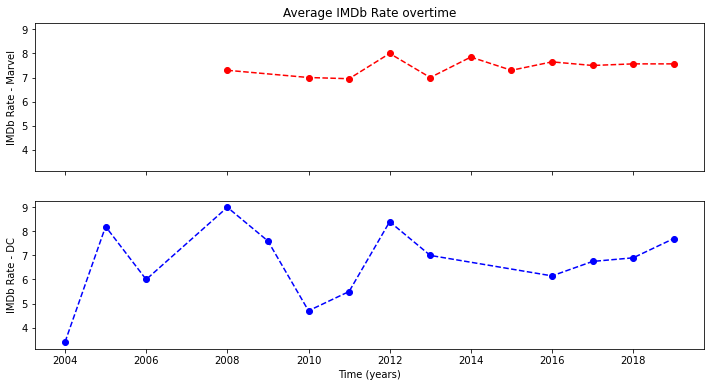

In [58]:
fig, ax = plt.subplots(2, 1, sharex = True, sharey = True, figsize=(12,6))

ax[0].plot(marvel_yearly_avg.index.values, marvel_yearly_avg["imdb_rating"], marker = "o", linestyle = "--", color = "r")
ax[1].plot(dc_yearly_avg.index.values, dc_yearly_avg["imdb_rating"], marker = "o", linestyle = "--", color = "b")
ax[0].set_ylabel("IMDb Rate - Marvel")
ax[0].set_title("Average IMDb Rate overtime")
ax[1].set_ylabel("IMDb Rate - DC")
ax[1].set_xlabel("Time (years)")

Text(2018.5, 1004934000.0, 'DC')

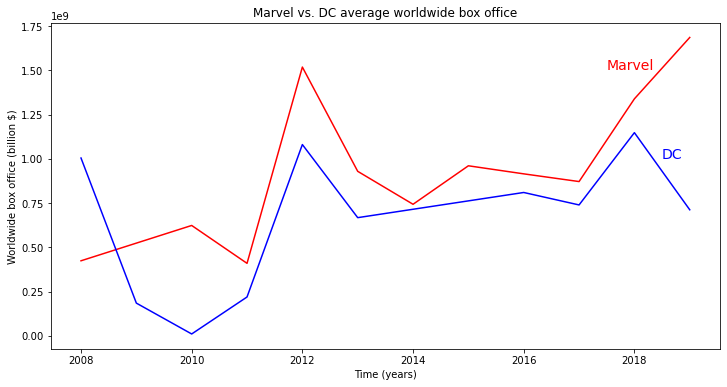

In [59]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(marvel_yearly_avg.index.values, marvel_yearly_avg["Gross Worldwide"], color = "r")

dc_08_19 = dc_yearly_avg.loc[2008:2019]
dc_08_19
ax.plot(dc_08_19.index.values, dc_08_19["Gross Worldwide"], color = "b")
ax.set_ylabel("Worldwide box office (billion $)")
ax.set_xlabel("Time (years)")
ax.set_title("Marvel vs. DC average worldwide box office")

ax.annotate("Marvel", xy= (2017.5, 1.504934e+09), xytext = (2017.5, 1.504934e+09), color ="r", fontsize = 14)
ax.annotate("DC", xy= (2018.5, 1.004934e+09), xytext = (2018.5, 1.004934e+09), color ="b", fontsize = 14)

### Seaborn

In [60]:
sns.set(rc = {'figure.figsize':(12,6)})
from scipy import stats

(0.8262388585410148, 1.6814520899250828e-10)

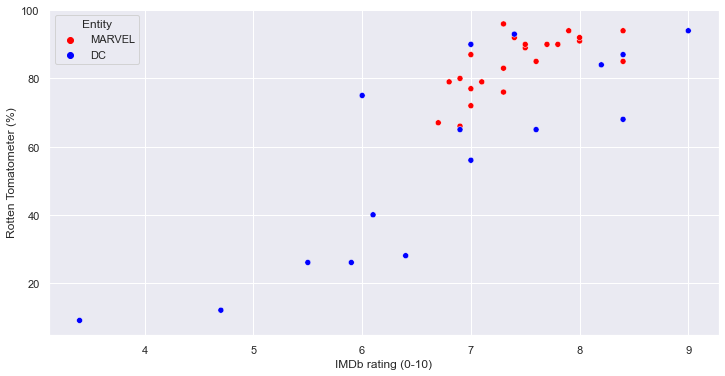

In [61]:
# Scatterplot

hue_colors = {"MARVEL" : "red",
             "DC" : "blue"}
sns.scatterplot(x='imdb_rating',y='tomato_meter', data=df, hue='Entity', palette=hue_colors)
plt.xlabel("IMDb rating (0-10)")
plt.ylabel("Rotten Tomatometer (%)")

stats.pearsonr(df['imdb_rating'], df['tomato_meter'])

#### Correlation coefficient of 0.83

Looking at the plot and the calculated correlation coefficient, there is a strong positive relationship between IMDb rates and Tomatometer score. 

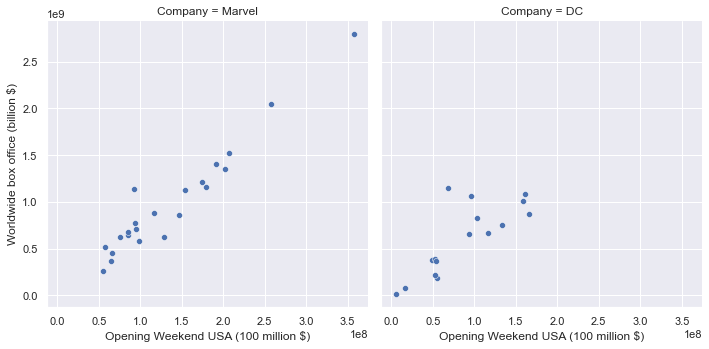

In [62]:
# Relational plot between Opening Weekend USA and Gross Worldwide

plot = sns.relplot(x="Opening Weekend USA", y="Gross Worldwide", ci=None, data=df, col="Company")
    
plot.set_ylabels("Worldwide box office (billion $)")
plot.set_xlabels("Opening Weekend USA (100 million $)")

### Pearson correlation coefficient

#### Correlation coefficients are used to measure how strong a relationship is between two variables. 

In [63]:
# marvel_movies

weekend_and_worldwide_marvel = marvel_movies[["Opening Weekend USA", "Gross Worldwide"]]
weekend_and_worldwide_marvel.corr(method='pearson')

,Opening Weekend USA,Gross Worldwide
Opening Weekend USA,1.000000,0.963534
Gross Worldwide,0.963534,1.000000


In [64]:
# dc_movies

weekend_and_worldwide_dc = dc_movies[["Opening Weekend USA", "Gross Worldwide"]]
weekend_and_worldwide_dc.corr(method='pearson')

,Opening Weekend USA,Gross Worldwide
Opening Weekend USA,1.000000,0.794068
Gross Worldwide,0.794068,1.000000


Text(33.44938819444445, 0.5, 'Worldwide box office (billion $)')

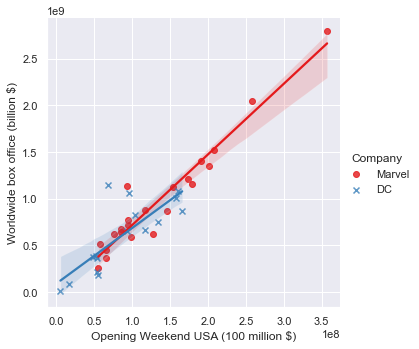

In [65]:
# Linear model

sns.lmplot(x="Opening Weekend USA", y="Gross Worldwide", data=df, hue="Company",  palette="Set1", markers=["o", "x"])
plt.xlabel("Opening Weekend USA (100 million $)")
plt.ylabel("Worldwide box office (billion $)")

Text(0.5, 1.0, 'Marvel Opening Weekend Box Office USA')

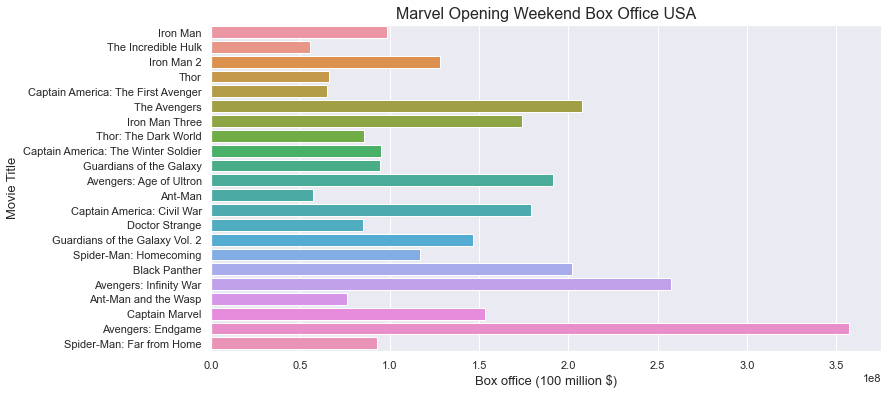

In [66]:
# Bar chart

sns.barplot(y= "Title", x= "Opening Weekend USA", data=marvel_movies)
plt.xlabel("Box office (100 million $)", fontsize=13)
plt.ylabel("Movie Title", fontsize=13)
plt.title("Marvel Opening Weekend Box Office USA", fontsize=16)

Text(0.5, 1.0, 'DC Opening Weekend Box Office USA')

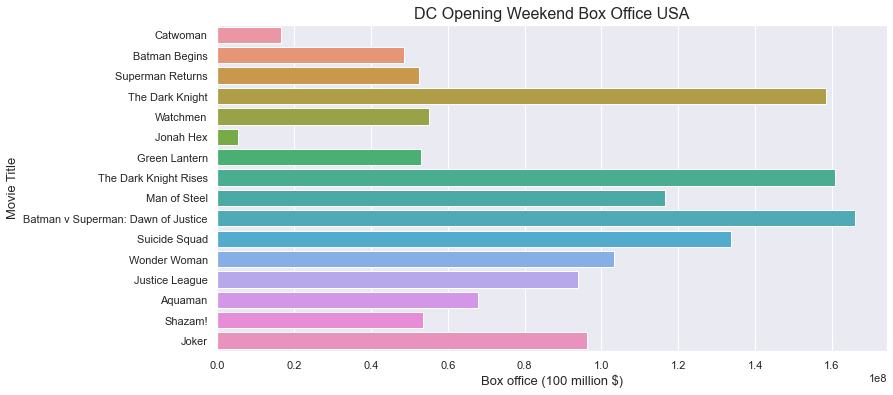

In [67]:
sns.barplot(y= "Title", x= "Opening Weekend USA", data=dc_movies)
plt.xlabel("Box office (100 million $)", fontsize=13)
plt.ylabel("Movie Title", fontsize=13)
plt.title("DC Opening Weekend Box Office USA", fontsize=16)

<BarContainer object of 2 artists>

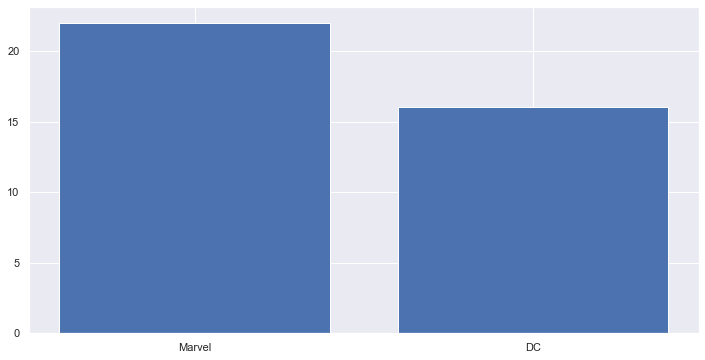

In [68]:
# Count plot - total movies produced by Marvel and DC

values = df['Company'].value_counts().values
company= df['Company'].value_counts().index

plt.bar(company, values)

Text(0.5, 1.0, 'Movies released per year')

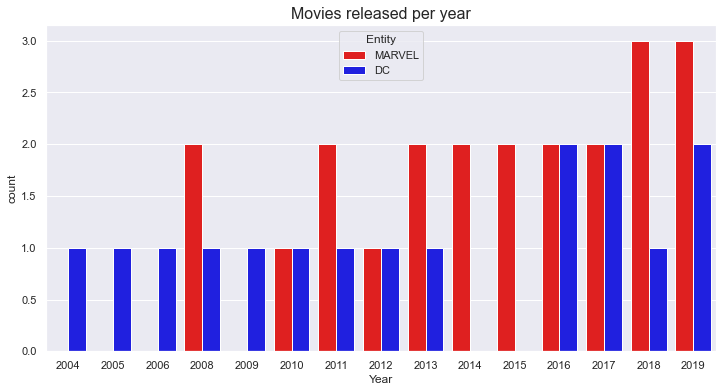

In [69]:
# Movies released per year

hue_colors = {"MARVEL" : "red",
             "DC" : "blue"}
sns.countplot(data=df, x='Year', hue='Entity', palette=hue_colors)
plt.title("Movies released per year", fontsize=16)

Text(0.5, 1.0, 'Average worldwide box office generated per movie director')

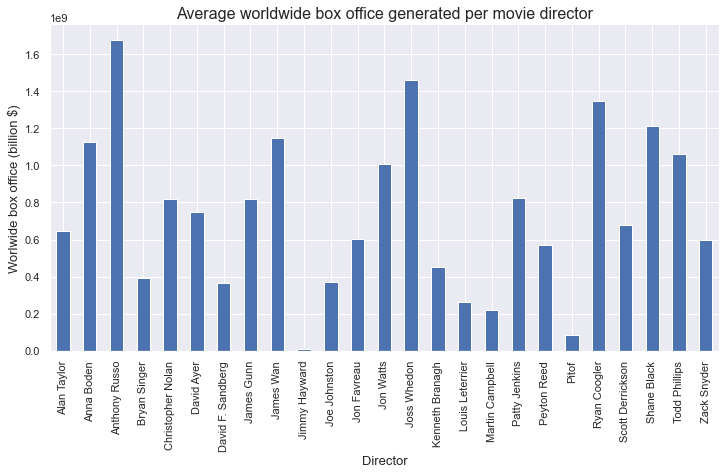

In [70]:
df.groupby('Director').mean()['Gross Worldwide'].plot.bar()

plt.xlabel("Director", fontsize=13)
plt.ylabel("Worlwide box office (billion $)", fontsize=13)
plt.title("Average worldwide box office generated per movie director", fontsize=16)